# 2022 Store Sales Forecasting Kaggle Competition

### Time series modelling foundations

0 0 14
3000888
3000888
3000888
date          0
oil_price    43
dtype: int64
            date  oil_price
0     2013-01-01        NaN
1     2013-01-02      93.14
2     2013-01-03      92.97
3     2013-01-04      93.12
4     2013-01-07      93.20
...          ...        ...
1213  2017-08-25      47.65
1214  2017-08-28      46.40
1215  2017-08-29      46.46
1216  2017-08-30      45.96
1217  2017-08-31      47.26

[1218 rows x 2 columns]
date         0
oil_price    1
dtype: int64
            date  oil_price
0     2013-01-01        NaN
1     2013-01-02      93.14
2     2013-01-03      92.97
3     2013-01-04      93.12
4     2013-01-07      93.20
...          ...        ...
1213  2017-08-25      47.65
1214  2017-08-28      46.40
1215  2017-08-29      46.46
1216  2017-08-30      45.96
1217  2017-08-31      47.26

[1218 rows x 2 columns]


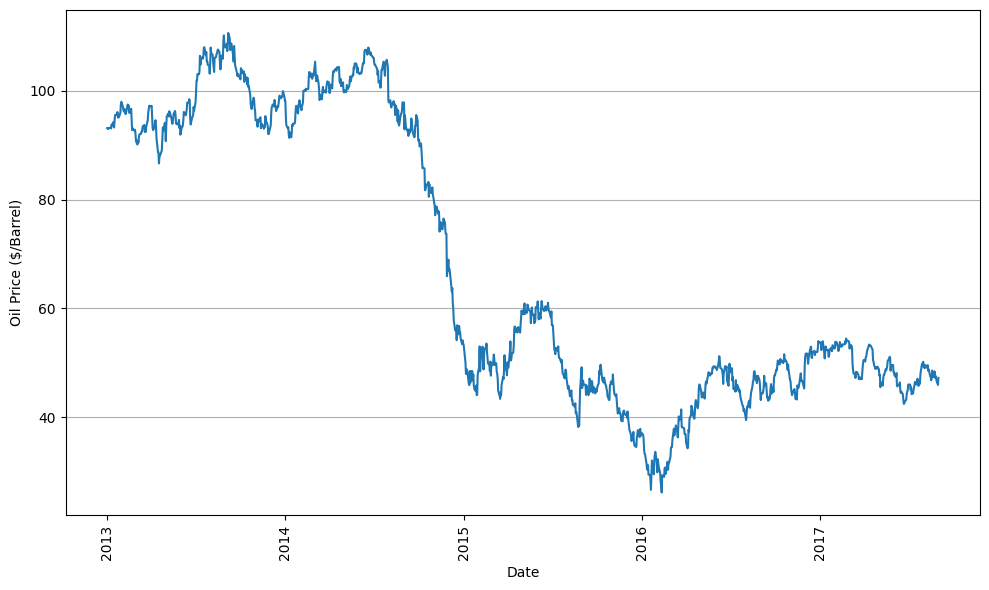

National:  254826 Regional:  1023 Local:  12243
Earthquake:  51678 World cup:  51678
Christmas:  39204


In [58]:
%run "C:\Users\James\Documents\Kaggle\Store Sales\Cleaning and Merging_updated 20230101.ipynb".ipynb

In [59]:
train_complete_merge.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,sales_to_promo_ratio,...,holiday_regional_binary,holiday_local_binary,earthquake_binary,world_cup_binary,christmas_binary,dayofwk,flag_1st,flag_lastday,flag_15th,family_new
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN


In [60]:
train_complete_merge = train_complete_merge

In [61]:
train_complete_merge.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,sales_to_promo_ratio,...,holiday_regional_binary,holiday_local_binary,earthquake_binary,world_cup_binary,christmas_binary,dayofwk,flag_1st,flag_lastday,flag_15th,family_new
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,NaN,...,0,0,0,0,0,1,1,0,0,NaN


### Import Packges

In [5]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

### Base model - Total Sales on Aggregate for Ecuador

In [6]:
train_base = train_complete_merge.groupby(train_complete_merge['date']).agg({'sales': sum})

print(train_base.columns)
print(train_base.head())
train_base.tail()

# make it a dataframe

Index(['sales'], dtype='object')
                    sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229


,sales
date,
2017-08-11,826373.722022
2017-08-12,792630.535079
2017-08-13,865639.677471
2017-08-14,760922.406081
2017-08-15,762661.935939


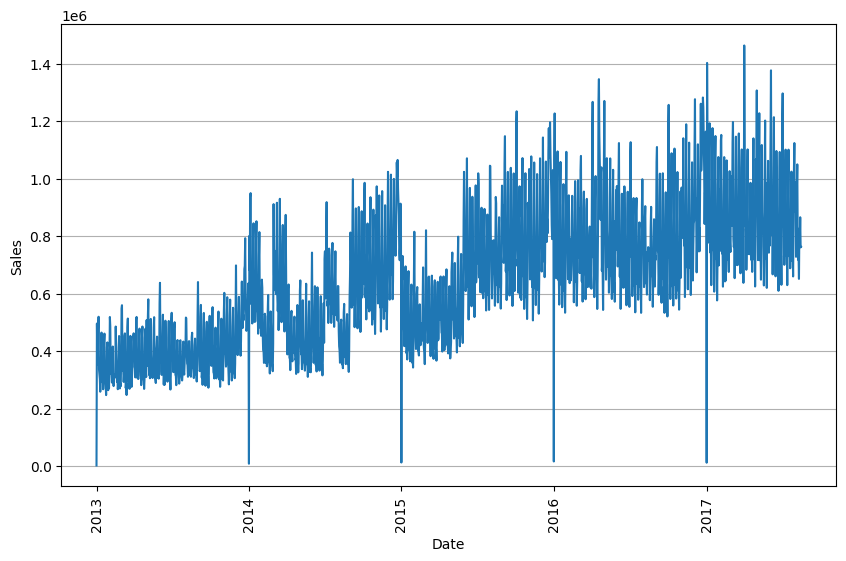

In [7]:
# Check the plot

plt.figure(figsize=(10, 6))
plt.plot(train_base["sales"])
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

In [8]:
train_base[train_base['sales'] < 100000]

,sales
date,
2013-01-01,2511.618999
2014-01-01,8602.065404
2015-01-01,12773.616980
2016-01-01,16433.394000
2017-01-01,12082.500997


### Stationarity testing

Stationarity returns to zero rather quickly
as ro increases, there are more runs of positive and negative trends
the series still returns to zero
X_t = p*X_t + e_t
where -1 < p < 1

Non-stationarity there is no finite time when the time series returns to zero

Stationarity does not have trend, seasonality but can have cycles



In [9]:
test_results = adfuller(train_base["sales"])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")
print("Critical thresholds:")

# therefore non-statinarity

ADF test statistic: -2.616195748604854
p-value: 0.08969592175787516
Critical thresholds:


In [10]:
# Differencing

train_base["diff_1"] = train_base["sales"].diff(periods=1) # first order of differencing
train_base["diff_2"] = train_base["sales"].diff(periods=2) # second order of differencing
train_base["diff_3"] = train_base["sales"].diff(periods=3) # third order of differencing

train_base.head(6)

,sales,diff_1,diff_2,diff_3
date,,,,
2013-01-01,2511.618999,NaN,NaN,NaN
2013-01-02,496092.417944,493580.798945,NaN,NaN
2013-01-03,361461.231124,-134631.186820,358949.612125,NaN
2013-01-04,354459.677093,-7001.554031,-141632.740851,351948.058094
2013-01-05,477350.121229,122890.444136,115888.890105,-18742.296715
2013-01-06,519695.401088,42345.279859,165235.723995,158234.169964


In [11]:
# Check for stationarity on first order differencing

results = adfuller(train_base["sales"].dropna())
results[1] # Non-stationarity still

0.08969592175787516

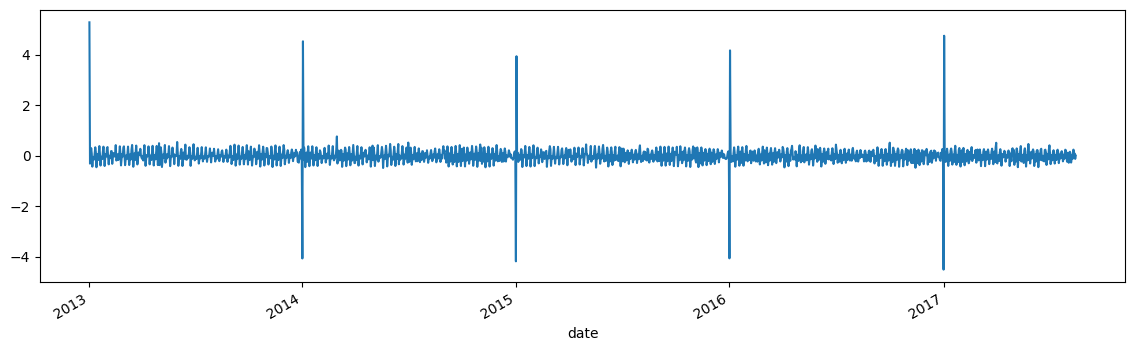

In [12]:
# Convert to stationarity

transformed_train_base = pd.Series(np.log(train_base["sales"])).diff().dropna()

transformed_train_base.plot(figsize=(14, 4));

## NEED TO DO SOMETHING ABOUT 1 JAN

In [13]:
# test

results = adfuller(transformed_train_base)
results[1] # Stationarity

3.498563849930614e-20

In [14]:
transformed_train_base = pd.DataFrame(transformed_train_base)
transformed_train_base.head()
#pacf_plot = plot_pacf(transformed_train_base.sales)

,sales
date,
2013-01-02,5.285835
2013-01-03,-0.316607
2013-01-04,-0.019560
2013-01-05,0.297656
2013-01-06,0.084993


c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


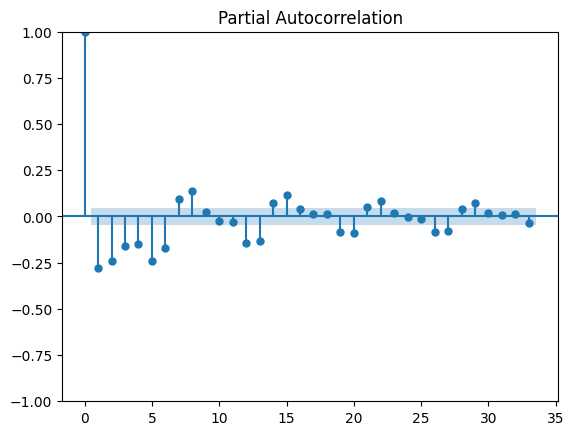

In [15]:
pacf_plot = plot_pacf(transformed_train_base.sales)

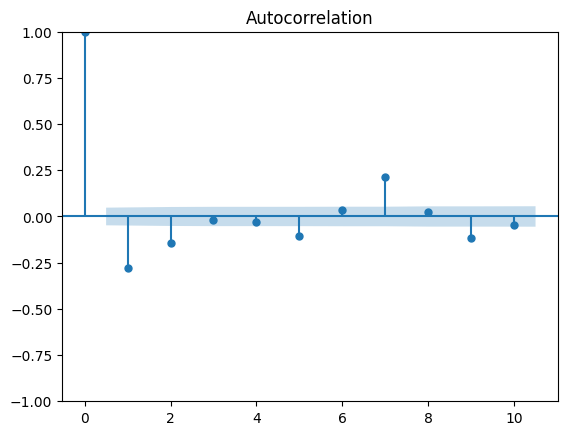

In [16]:
# ACF

acf_plot = plot_acf(transformed_train_base.sales, lags = 10)

In [17]:
# ARIMA Model

from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(transformed_train_base.sales, order=(1,0,0))
model = arima_model.fit()
print(model.summary())

c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1683
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -701.835
Date:                Sun, 29 Jan 2023   AIC                           1409.669
Time:                        16:07:02   BIC                           1425.954
Sample:                             0   HQIC                          1415.701
                               - 1683                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.008      0.337      0.736      -0.013       0.018
ar.L1         -0.3153      0.005    -57.851      0.000      -0.326      -0.305
sigma2         0.1348      0.001    152.695      0.0

In [18]:
import pmdarima as pm

auto_arima = pm.auto_arima(transformed_train_base, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

0.21687462863933452

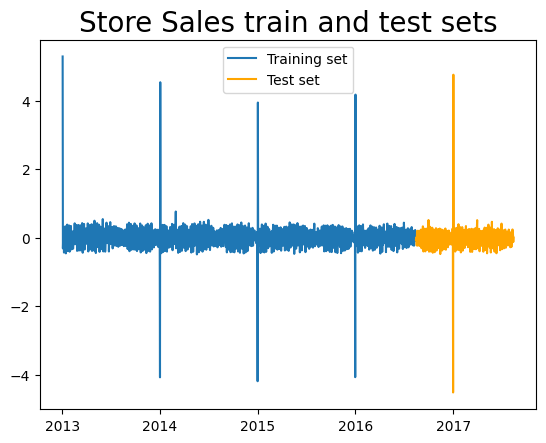

In [22]:
# Split Data into Training and Testing

test_size = 365
df_train = transformed_train_base[:-test_size]
df_test = transformed_train_base[-test_size:]
plt.title('Store Sales train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

test_size/len(transformed_train_base)

In [ ]:
# ARIMA Model

from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(transformed_train_base.sales, order=(2,0,3))
model = arima_model.fit()
print(model.summary())

c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1683
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -388.837
Date:                Mon, 23 Jan 2023   AIC                            791.674
Time:                        17:50:18   BIC                            829.673
Sample:                             0   HQIC                           805.749
                               - 1683                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.173      0.030    5.75e-05       0.001
ar.L1          1.1489      0.032     36.018      0.000       1.086       1.211
ar.L2         -0.8579      0.023    -36.541      0.0

c:\Users\James\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
# Prediction
start = len(df_train)
end=len(df_train) + len(df_test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

date
2016-08-15   -0.016570
2016-08-16    0.021259
2016-08-17    0.004067
2016-08-18    0.000296
2016-08-19    0.075676
                ...   
2017-08-11    0.041176
2017-08-12   -0.071546
2017-08-13    0.016615
2017-08-14   -0.024308
2017-08-15    0.044121
Name: predicted_mean, Length: 365, dtype: float64


In [47]:
# Test
print(type(df_test))
print(len(df_test))
df_test.head()


<class 'pandas.core.frame.DataFrame'>
365


,sales
date,
2016-08-15,-0.056422
2016-08-16,-0.001891
2016-08-17,0.010071
2016-08-18,-0.229026
2016-08-19,0.161829


In [48]:
# Prediction
print(type(pred))
df_pred =pd.DataFrame(pred)
print(type(df_pred))
print(len(df_pred))
df_pred.head()



<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
365


,predicted_mean
date,
2016-08-15,-0.016570
2016-08-16,0.021259
2016-08-17,0.004067
2016-08-18,0.000296
2016-08-19,0.075676


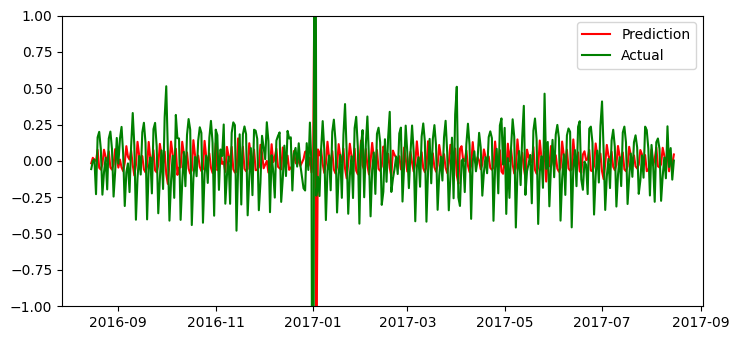

In [54]:
# Plot prediction
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(df_pred, c='red', label="Prediction")
plt.plot(df_test, c='green', label="Actual")
plt.ylim(-1, 1)
plt.legend(loc="upper right")
plt.show()


In [57]:
# RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df_pred,df_test))
print("RMSE: ", rmse)

RMSE:  0.3708861515495362
